<h1 style="background-color:black;color:white;text-align:center;padding:10px">2019년 ~ 2020년 상반기 눈여겨볼 종목 시각화 및 투자자 등급,성향별 분석</h1>

<h2>도입</h2>

<h4>요즘 제 주변에서도 주식에 관한 얘기를 많이합니다. <br><br>
2019년 부터 2020년 상반기 해외 주식 종목과 투자자에 대해서 시각화했습니다.</h4>

<h2>기획</h2>

<h4>제가 주식을 잘 몰라서 예측은 못하고 분석과 시각화에 집중했습니다.<br><br>
   <span style="color:red">바로</span> 보시려면 눌러주세요.</h4> 
 
[바로보기](#visual)

<h2>데이터 분석</h2>

<h4>필요한 라이브러리</h4>

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 제어
import warnings
warnings.filterwarnings('ignore')

# 특정 시각화 라이브러리
import squarify as tree
import folium
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# 시각
from datetime import date

# matplotlib 
import matplotlib.dates as mdates
xfmt = mdates.DateFormatter('%Y-%m-%d')
import datetime as DT
import matplotlib.dates as mdates

# font 
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

<h3>데이터 로드</h3>

2_trd_kr.csv 는 이번 분석에 사용 안했습니다.

In [2]:
customer=pd.read_csv('리그2/2_cus_info.csv')
account=pd.read_csv('리그2/2_act_info.csv')
trade=pd.read_csv('리그2/2_trd_oss.csv')
iem=pd.read_csv('리그2/2_iem_info.csv')

<h3>데이터 살펴보기</h3>

In [3]:
customer.head()

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-


In [4]:
obj_customer=customer.select_dtypes(include='object')
obj_customer.describe()

,cus_id,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
count,10000,10000,10000,10000
unique,10000,18,7,8
top,090a53fed9668fb29d7a616d6c433b59befef3f53477b3...,41,09,-
freq,1,2701,2810,4308


In [5]:
customer[customer.columns.difference(obj_customer.columns)].describe()

,cus_age,sex_dit_cd
count,10000.00000,10000.000000
mean,42.17300,1.380900
std,13.85703,0.485632
min,0.00000,1.000000
25%,35.00000,1.000000
50%,45.00000,1.000000
75%,50.00000,2.000000
max,70.00000,2.000000


<h3>데이터 전처리</h3>

In [6]:
# customer age
# 0은 말이 안되므로 가정한다.

def age_band(x):
    if x==0:
        return '20세 이하'
    else:
        return x

customer['cus_age']=customer['cus_age'].map(age_band)

In [7]:
# 등급 및 유형 불피요한 것 제거
customer_re=customer.loc[(customer['tco_cus_grd_cd']!='_ ')&(customer['ivs_icn_cd']!='-')&(customer['ivs_icn_cd']!='00')]

In [8]:
# 등급 및 유형
def tco(x):
    if x=='01':
        return '탑클래스'
    elif x=='02':
        return '골드'
    elif x=='03':
        return '로얄'
    elif x=='04':
        return '그린'
    elif x=='05':
        return '블루'
    else:
        return '등급없음'
    
def ivs(x):
    if x=='01':
        return '안정형'
    elif x=='02':
        return '안정추구형'
    elif x=='03':
        return '위험중립형'
    elif x=='04':
        return '적극투자형'
    elif x=='05':
        return '공격투자형'
    elif x=='09':
        return '전문투자자형'
    else:
        return '등급없음'
    
customer_re['tco_cus_grd_cd']=customer_re['tco_cus_grd_cd'].map(tco)
customer_re['ivs_icn_cd']=customer_re['ivs_icn_cd'].map(ivs)

<h3>시각화 전처리</h3>

heatmap

In [9]:
def heatmap():
    fig,ax=plt.subplots(2,1,figsize=(8,6),dpi=200)
    heat_1=customer_re.groupby('ivs_icn_cd')['cus_age'].value_counts().unstack(fill_value=0).loc[columns]

    sns.heatmap(heat_1,annot=True,square=True,fmt='d',ax=ax[1],linewidth=0.5,
                cmap='Blues',cbar=False)
    ax[1].set_yticklabels(heat_1.index,rotation=0)
    ax[1].set_ylabel('')
    ax[1].set_xlabel('나이 범위')
    ax[1].set_title("나이대 별 투자성향 - heatmap",fontweight='bold')

    heat_2=customer_re.groupby('tco_cus_grd_cd')['cus_age'].value_counts().unstack(fill_value=0).loc[indexs]

    sns.heatmap(heat_2,annot=True,square=True,fmt='d',ax=ax[0],linewidth=0.5,
                cmap='Blues',cbar=False)
    ax[0].set_yticklabels(heat_2.index,rotation=0)
    ax[0].set_ylabel('')
    ax[0].set_xlabel('나이 범위')
    ax[0].set_title("나이대 별 등급 - heatmap",fontweight='bold')

    plt.tight_layout()
    plt.show()

pie scatter chart

In [10]:
# pie scatter plot 순서 정렬
indexs=[
    '탑클래스',
    '골드',
    '로얄',
    '그린',
    '블루',
    '등급없음'
]
columns=[
    '안정형',
    '안정추구형',
    '위험중립형',
    '적극투자형',
    '공격투자형',
    '전문투자자형'
]

In [11]:
# pie scatter chart 전처리
pie_customer_man=customer_re[customer_re['sex_dit_cd']==1].groupby('tco_cus_grd_cd')['ivs_icn_cd'].\
value_counts().unstack(fill_value=0).loc[indexs,columns]
pie_customer_woman=customer_re[customer_re['sex_dit_cd']==2].groupby('tco_cus_grd_cd')['ivs_icn_cd'].\
value_counts().unstack(fill_value=0)
pie_customer_woman['전문투자자형']=0
pie_customer_woman=pie_customer_woman.loc[indexs,columns]
pie_customer_group=customer_re.groupby('tco_cus_grd_cd')['ivs_icn_cd'].\
value_counts().unstack(fill_value=0).loc[indexs,columns]

In [12]:
# https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis

def drawPie(xp,yp,ratios,colors,sizes,ax):
    markers=[]
    before=0
    for ratio,color in zip(ratios,colors):
        after=before+2*np.pi*ratio
        x=[0]+np.cos(np.linspace(before,after,50)).tolist()
        y=[0]+np.sin(np.linspace(before,after,50)).tolist()
        xy=np.column_stack([x,y])
        before=after
        markers.append({'marker':xy,'s':np.abs(xy).max()**2*np.array(sizes),
                        'facecolor':color})
    for marker in markers:
        ax.scatter(xp,yp,**marker,alpha=0.7)

In [13]:
# 나중에 깔끔하게 보이기 위한 단순 함수 적용.

def Piescatter(title):
    fig=plt.figure(figsize=(23,26),dpi=200)
    gs=fig.add_gridspec(5,5)

    ax_scatter=fig.add_subplot(gs[1:4,0:4])
    for idx in indexs[::-1]:
        for col in columns:
            man=pie_customer_man.loc[idx,col]
            woman=pie_customer_woman.loc[idx,col]
            total=pie_customer_group.loc[idx,col]   
            drawPie([col],[idx],[man/(man+woman),woman/(man+woman)],
                    ['#41a1f0','#f5536e'],[total**1.5],ax=ax_scatter)

    ax_scatter.set_xticklabels(labels=columns,fontsize=15,fontweight='bold')
    ax_scatter.set_yticklabels(labels=indexs[::-1],fontsize=15,fontweight='bold')

    ax_up=fig.add_subplot(gs[0,:4],sharex=ax_scatter)

    man_up=customer_re[customer_re['sex_dit_cd']==1]['ivs_icn_cd'].value_counts().loc[columns]
    woman_up=customer_re[customer_re['sex_dit_cd']==2]['ivs_icn_cd'].value_counts()
    woman_up['전문투자자형']=0
    woman_up=woman_up.loc[columns]

    ax_up.bar(x=woman_up.index,height=woman_up,width=0.5,color='#f5536e')
    ax_up.bar(x=man_up.index,height=man_up,width=0.5,color='#41a1f0',bottom=woman_up)

    ax_side=fig.add_subplot(gs[1:4,4],sharey=ax_scatter)

    man_side=customer_re[customer_re['sex_dit_cd']==1]['tco_cus_grd_cd'].value_counts().loc[indexs]
    woman_side=customer_re[customer_re['sex_dit_cd']==2]['tco_cus_grd_cd'].value_counts().loc[indexs]

    ax_side.barh(y=woman_side.index[::-1],width=woman_side[::-1],height=0.5,color='#f5536e')
    ax_side.barh(y=man_side.index[::-1],width=man_side[::-1],height=0.5,color='#41a1f0',left=woman_side[::-1])

    plt.setp(ax_side.get_yticklabels(),visible=False)
    plt.setp(ax_up.get_xticklabels(),visible=False)

    for s in ['top','right','bottom','left']:
        ax_scatter.spines[s].set_visible(False)
        ax_side.spines[s].set_visible(False)
        ax_up.spines[s].set_visible(False)

    fig.text(x=0.15,y=0.9,s=title,
            fontweight='bold',fontsize=35)
    fig.suptitle('전문투자자 pie scatter가 보이지 않는 이유는 woman의 전문투자자가 없습니다.\
    bar chart를 보시면 남자는 있습니다. (남자 : 파랑, 여자 : 분홍)',x=0.45,y=0.89,fontsize=20)
    plt.show()

folium map

In [14]:
# folium 맵 전처리
geo=pd.DataFrame({
    'region':['Gyeonggi','Seoul','Gyeongnam','Busan','Dae-gu','Gyeongbuk','Incheon','Daejeon','Ulsan','Gyeongbuk','Jeonnam','Jeonbuk','Gangwon','Sejong','Jeju','Chungnam','Chungbuk'],
    'lat':[37.4138,37.5665,35.4606,35.1796,35.8714,35.1595,37.4563,36.3504,35.5384,36.4919,34.8679,35.7175,37.8228,36.3000,33.4890,36.5184,36.8000],
    'long':[127.5183,126.9780,128.2132,129.0756,128.6014,126.8526,126.7052,127.3845,129.3114,128.8889,126.9910,127.1530,128.1555,127.1600,126.4983,126.8000,127.7000]
})

In [15]:
# geo_data 정리.
geo_data=customer_re['zip_ctp_cd'].value_counts().drop('-',axis=0).to_frame().reset_index()
geo_data.columns=['code','count']

In [16]:
# 맵 이름 전처리
def code(x):
    if x=='11':
        return 'Seoul'
    elif x=='41':
        return 'Gyeonggi'
    elif x=='48':
        return 'Gyeongnam'
    elif x=='26':
        return 'Busan'
    elif x=='27':
        return 'Dae-gu'
    elif x=='47':
        return 'Gyeongbuk'
    elif x=='28':
        return 'Incheon'
    elif x=='44':
        return 'Chungnam'
    elif x=='46':
        return 'Jeonnam'
    elif x=='30':
        return 'Daejeon'
    elif x=='29':
        return 'Gwangju'
    elif x=='43':
        return 'Chungbuk'
    elif x=='45':
        return 'Jeonbuk'
    elif x=='42':
        return 'Gangwon'
    elif x=='31':
        return 'Ulsan'
    elif x=='50':
        return 'Jeju'
    elif x=='36':
        return 'Sejong'

region=['Seoul', 'Gyeonggi', 'Gyeongnam', 'Busan', 'Incheon', 'Dae-gu',
       'Gyeongbuk', 'Chungnam', 'Daejeon', 'Jeonnam',
       'Gangwon', 'Chungbuk', 'Jeonbuk', 'Ulsan', 'Sejong', 'Jeju']

geo_data['region']=geo_data['code'].map(code)

# 마무리 병합.
geo_data=pd.merge(geo_data,geo,on='region')


In [17]:
# 깔끔하게.

def Map():
    '''
    어느 지역에 투자자가 많은지.
    '''
    m=folium.Map(location=[36,127],zoom_start=7)

    for row in geo_data[['count','lat','long','region']].iterrows():
        folium.CircleMarker(
            location=[row[1]['lat'],row[1]['long']],
            radius=row[1]['count']/geo_data['count'].sum()*150,
            popup=row[1]['region'],
            color='#3186cc',
            fill=True,
            fill_color='#3186cc'
        ).add_to(m)
    return m

In [18]:
def Map2():
    '''
    지역별 유형 heatmap
    '''
    customer_re['zip_ctp_cd']=customer_re[customer_re['zip_ctp_cd']!='-']['zip_ctp_cd'].map(code)

    Map2=customer_re.\
    groupby('zip_ctp_cd')['ivs_icn_cd'].value_counts(normalize=True).\
    unstack(fill_value=0).loc[region,columns].style.background_gradient(cmap='PuBu').format("{:.2%}")
    return Map2

trade 와 합친 후 유형별 donut chart

In [19]:
# 모두 합치기

# customer 필요부분 추출
customer_select=customer_re[['cus_id','sex_dit_cd','cus_age','tco_cus_grd_cd','ivs_icn_cd']]

# account 병합
data1=pd.merge(customer_select,account,on='cus_id',how='left')

# len(set(trade['iem_cd'])-set(iem['iem_cd'])) 확인.
# iem 정리
iem['iem_krl_nm']=iem['iem_krl_nm'].apply(lambda x:x.strip())
iem=iem[['iem_cd','iem_krl_nm']]

In [20]:
# trade
# https://stackoverflow.com/questions/9750330/how-to-convert-integer-into-date-object-python/9750360

def int2date(argdate: int) -> date:
    """
    If you have date as an integer, use this method to obtain a datetime.date object.

    Parameters
    ----------
    argdate : int
      Date as a regular integer value (example: 20160618)

    Returns
    -------
    dateandtime.date
      A date object which corresponds to the given value `argdate`.
    """
    year = int(argdate / 10000)
    month = int((argdate % 10000) / 100)
    day = int(argdate % 100)

    return date(year, month, day)

trade['orr_dt']=pd.to_datetime(trade['orr_dt'].map(int2date),format='%Y-%m-%d')


# 범주화
def buy_or_sell(x):
    if x==1:
        return '매도'
    else:
        return '매수'

trade['sby_dit_cd']=trade['sby_dit_cd'].map(buy_or_sell)
# 병합
trade=pd.merge(trade,iem,on='iem_cd',how='left')

# 마무리 
trade=trade[['act_id','orr_dt','iem_krl_nm','sby_dit_cd']]

In [21]:
# 마무리 병합
data1=pd.merge(data1,trade,on='act_id',how='left').dropna()
data1=data1.drop(['act_opn_ym'],axis=1)

In [22]:
# https://www.kaggle.com/hakkisimsek/plotly-tutorial-1
# donut chart 

def PieChart(title, limit):
    '''
    유형 별 donut chart
    '''
    df1 = data1[data1['ivs_icn_cd'] == '안정형']
    df2 = data1[data1['ivs_icn_cd'] == '안정추구형']
    df3 = data1[data1['ivs_icn_cd'] == '공격투자형']
    df4 = data1[data1['ivs_icn_cd'] == '적극투자형']
    df5 = data1[data1['ivs_icn_cd'] == '위험중립형']
    count_df1 = df1['iem_krl_nm'].value_counts()[:limit]
    count_df2 = df2['iem_krl_nm'].value_counts()[:limit]
    count_df3 = df3['iem_krl_nm'].value_counts()[:limit]
    count_df4 = df4['iem_krl_nm'].value_counts()[:limit]
    count_df5 = df5['iem_krl_nm'].value_counts()[:limit]
    color = ['navy',  'cyan', 'lightgrey','orange', 'gold','lightgreen', 
             '#D0F9B1','tomato', 'tan','#eb4034']
    
    trace1 = go.Pie(labels=count_df1.index, 
                    values=count_df1.values, 
                    name= "안정형", 
                    hole= .5, 
                    domain= {'x': [0,0.2],'y':[0,1]},
                   marker=dict(colors=color),textposition='inside')
    trace2 = go.Pie(labels=count_df2.index, 
                    values=count_df2.values, 
                    name= "안정추구형", 
                    hole= .5, 
                    domain= {'x': [0.2,0.4],'y':[0,1]},
                   marker=dict(colors=color),textposition='inside')
    trace3 = go.Pie(labels=count_df3.index, 
                    values=count_df3.values, 
                    name= "공격투자형", 
                    hole= .5, 
                    domain= {'x': [0.4,0.6],'y':[0,1]},
                   marker=dict(colors=color),textposition='inside')
    trace4 = go.Pie(labels=count_df4.index, 
                    values=count_df4.values, 
                    name= "적극투자형", 
                    hole= .5, 
                    domain= {'x': [0.6,0.8],'y':[0,1]},
                   marker=dict(colors=color),textposition='inside')
    trace5 = go.Pie(labels=count_df5.index, 
                    values=count_df5.values, 
                    name= "위험중립형", 
                    hole= .5, 
                    domain= {'x': [0.8,1],'y':[0,1]},
                   marker=dict(colors=color),textposition='inside')

    layout = dict(title= title, font=dict(size=13),autosize=True,legend=dict(orientation="h"),
                  margin={'t':40,'r':40,'b':40,'l':40,'pad':20},
                  annotations = [
                      dict(
                          x=0.07, y=.5,
                          text='안정형', 
                          showarrow=False,
                          font=dict(size=15)
                      ),
                      dict(
                          x=.25, y=.5,
                          text='안정추구형', 
                          showarrow=False,
                          font=dict(size=15)
                      ),
                      dict(
                          x=.5, y=.5,
                          text='공격투자형', 
                          showarrow=False,
                          font=dict(size=15)
                      ),
                      dict(
                          x=.74, y=.5,
                          text='적극투자형', 
                          showarrow=False,
                          font=dict(size=15)
                      ),dict(
                          x=0.94, y=0.5,
                          text='위험중립형', 
                          showarrow=False,
                          font=dict(size=15)
                      )
        ])

    fig = dict(data=[trace1, trace2,trace3,trace4,trace5], layout=layout)
    py.iplot(fig)

tree chart

In [23]:
# tree plot 준비
top10_trade=data1.groupby('iem_krl_nm')['sby_dit_cd'].count().sort_values(ascending=False)[:10]

# 순서
tree_order=['마이크로소프트', '델타 에어라인스', '애플', 'AT&T', '테슬라',
            '월트 디즈니', '보잉', '스타벅스','코카콜라', '리얼티 인컴']

# count,size 및 label
count=[f"{value/top10_trade.values.sum()*100:.1f}%" for value in top10_trade.values]
labels=[label1+'\n'+str(label2) for label1,label2 in zip(tree_order,count)]
sizes=top10_trade.tolist()

In [24]:
def treeplot(title,labels,sizes):
    '''
    index : category 
    value : value 
    '''
    fig,ax=plt.subplots(1,1,figsize=(7,5),dpi=200)

    tree.plot(sizes=sizes,label=labels,color=sns.color_palette('vlag'),
             alpha=0.7,text_kwargs={'fontsize':8,'fontweight':'bold'})

    ax.set_title(title,fontsize=16,fontweight='bold')
    for s in ['top','right','bottom','left']:
        ax.spines[s].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

<h2><a id="visual">시각화 및 분석</a></h2>

등급이 가장 낮은 블루의 기준이 자산이 1천이상 있고, 수익기여도가 10만원 이상입니다.  

아래 그림은 나이대 별 등급 heatmap과 나이대 별 투자 성향 heatmap입니다.   

<mark>보통 나이가 많을 수록 자산이 많고, 적극적으로 투자한다는 것을 알 수 있습니다.</mark>

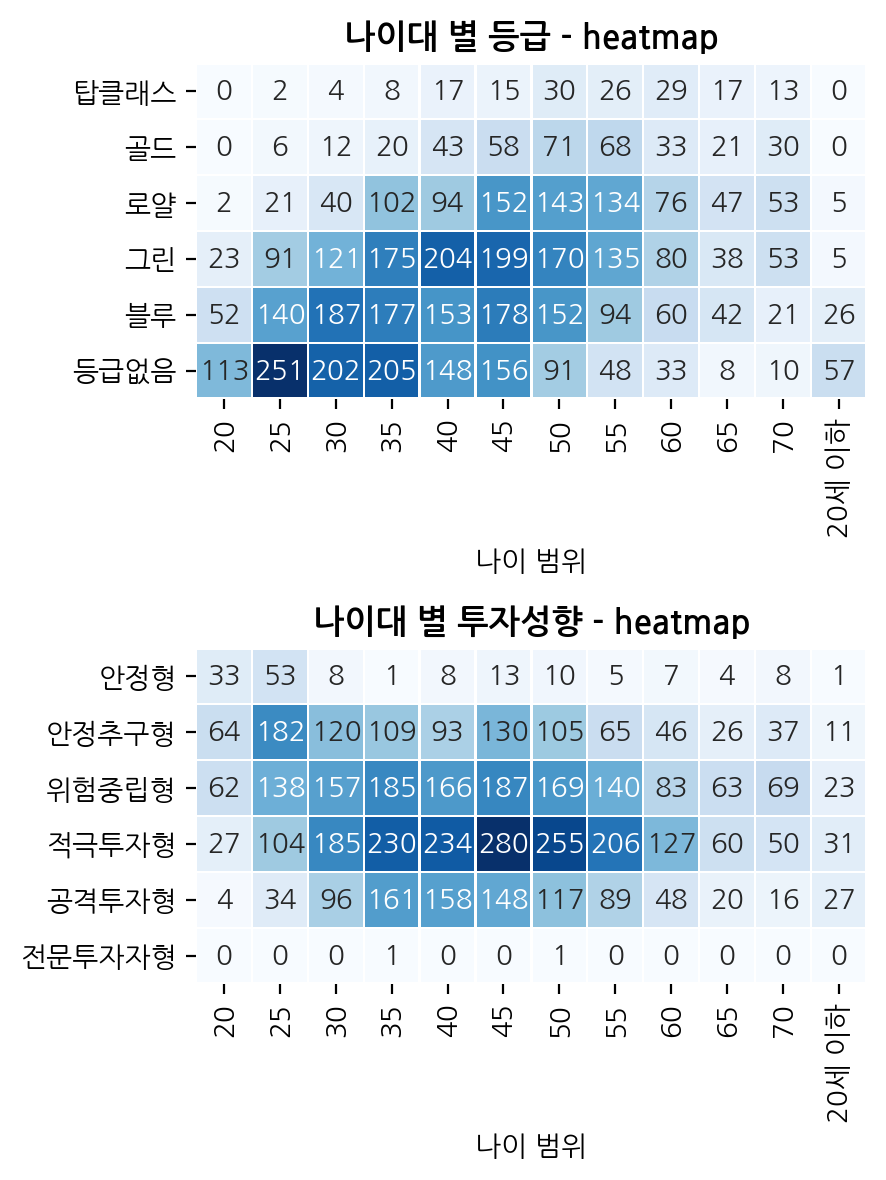

In [25]:
heatmap()

<mark>서울 경기 지역에 투자자들이 많습니다. </mark>

In [26]:
Map()

지역마다의 차이를 보기 위해 heatmap을 그렸습니다.    

안정형부터 공격투자형까지 비율이 산을 그리고 있습니다.    

<mark>위험중립형이나 적극투자형이 많고, 그 다음으로 공격투자형이 많습니다.</mark>   

In [27]:
Map2()

ivs_icn_cd,안정형,안정추구형,위험중립형,적극투자형,공격투자형,전문투자자형
zip_ctp_cd,,,,,,
Seoul,1.83%,16.62%,26.27%,34.01%,21.27%,0.00%
Gyeonggi,3.07%,19.20%,26.48%,35.69%,15.42%,0.14%
Gyeongnam,2.49%,19.94%,27.41%,32.09%,18.07%,0.00%
Busan,2.88%,19.42%,28.42%,32.37%,16.91%,0.00%
Incheon,5.88%,19.46%,29.41%,28.51%,16.74%,0.00%
Dae-gu,3.52%,16.08%,24.62%,32.66%,23.12%,0.00%
Gyeongbuk,4.66%,18.65%,25.91%,36.27%,14.51%,0.00%
Chungnam,0.54%,20.54%,26.49%,36.76%,15.68%,0.00%
Daejeon,4.64%,20.53%,26.49%,33.77%,14.57%,0.00%


성별과 유형, 등급을 합해서 시각화 해봤습니다.      

그린, 블루 등급분들이 제일 많습니다.     
  
그리고 안정추구형에 여자의 비율이 다른곳에 비해 많아보이지만,   

대부분의 사람들은 적극투자형이나 위험중립형입니다.      
  
그래도 이 데이터에서 알 수 있는 점은 <mark>여자보다 남자가 적극적으로 투자한다는 점</mark>입니다.   

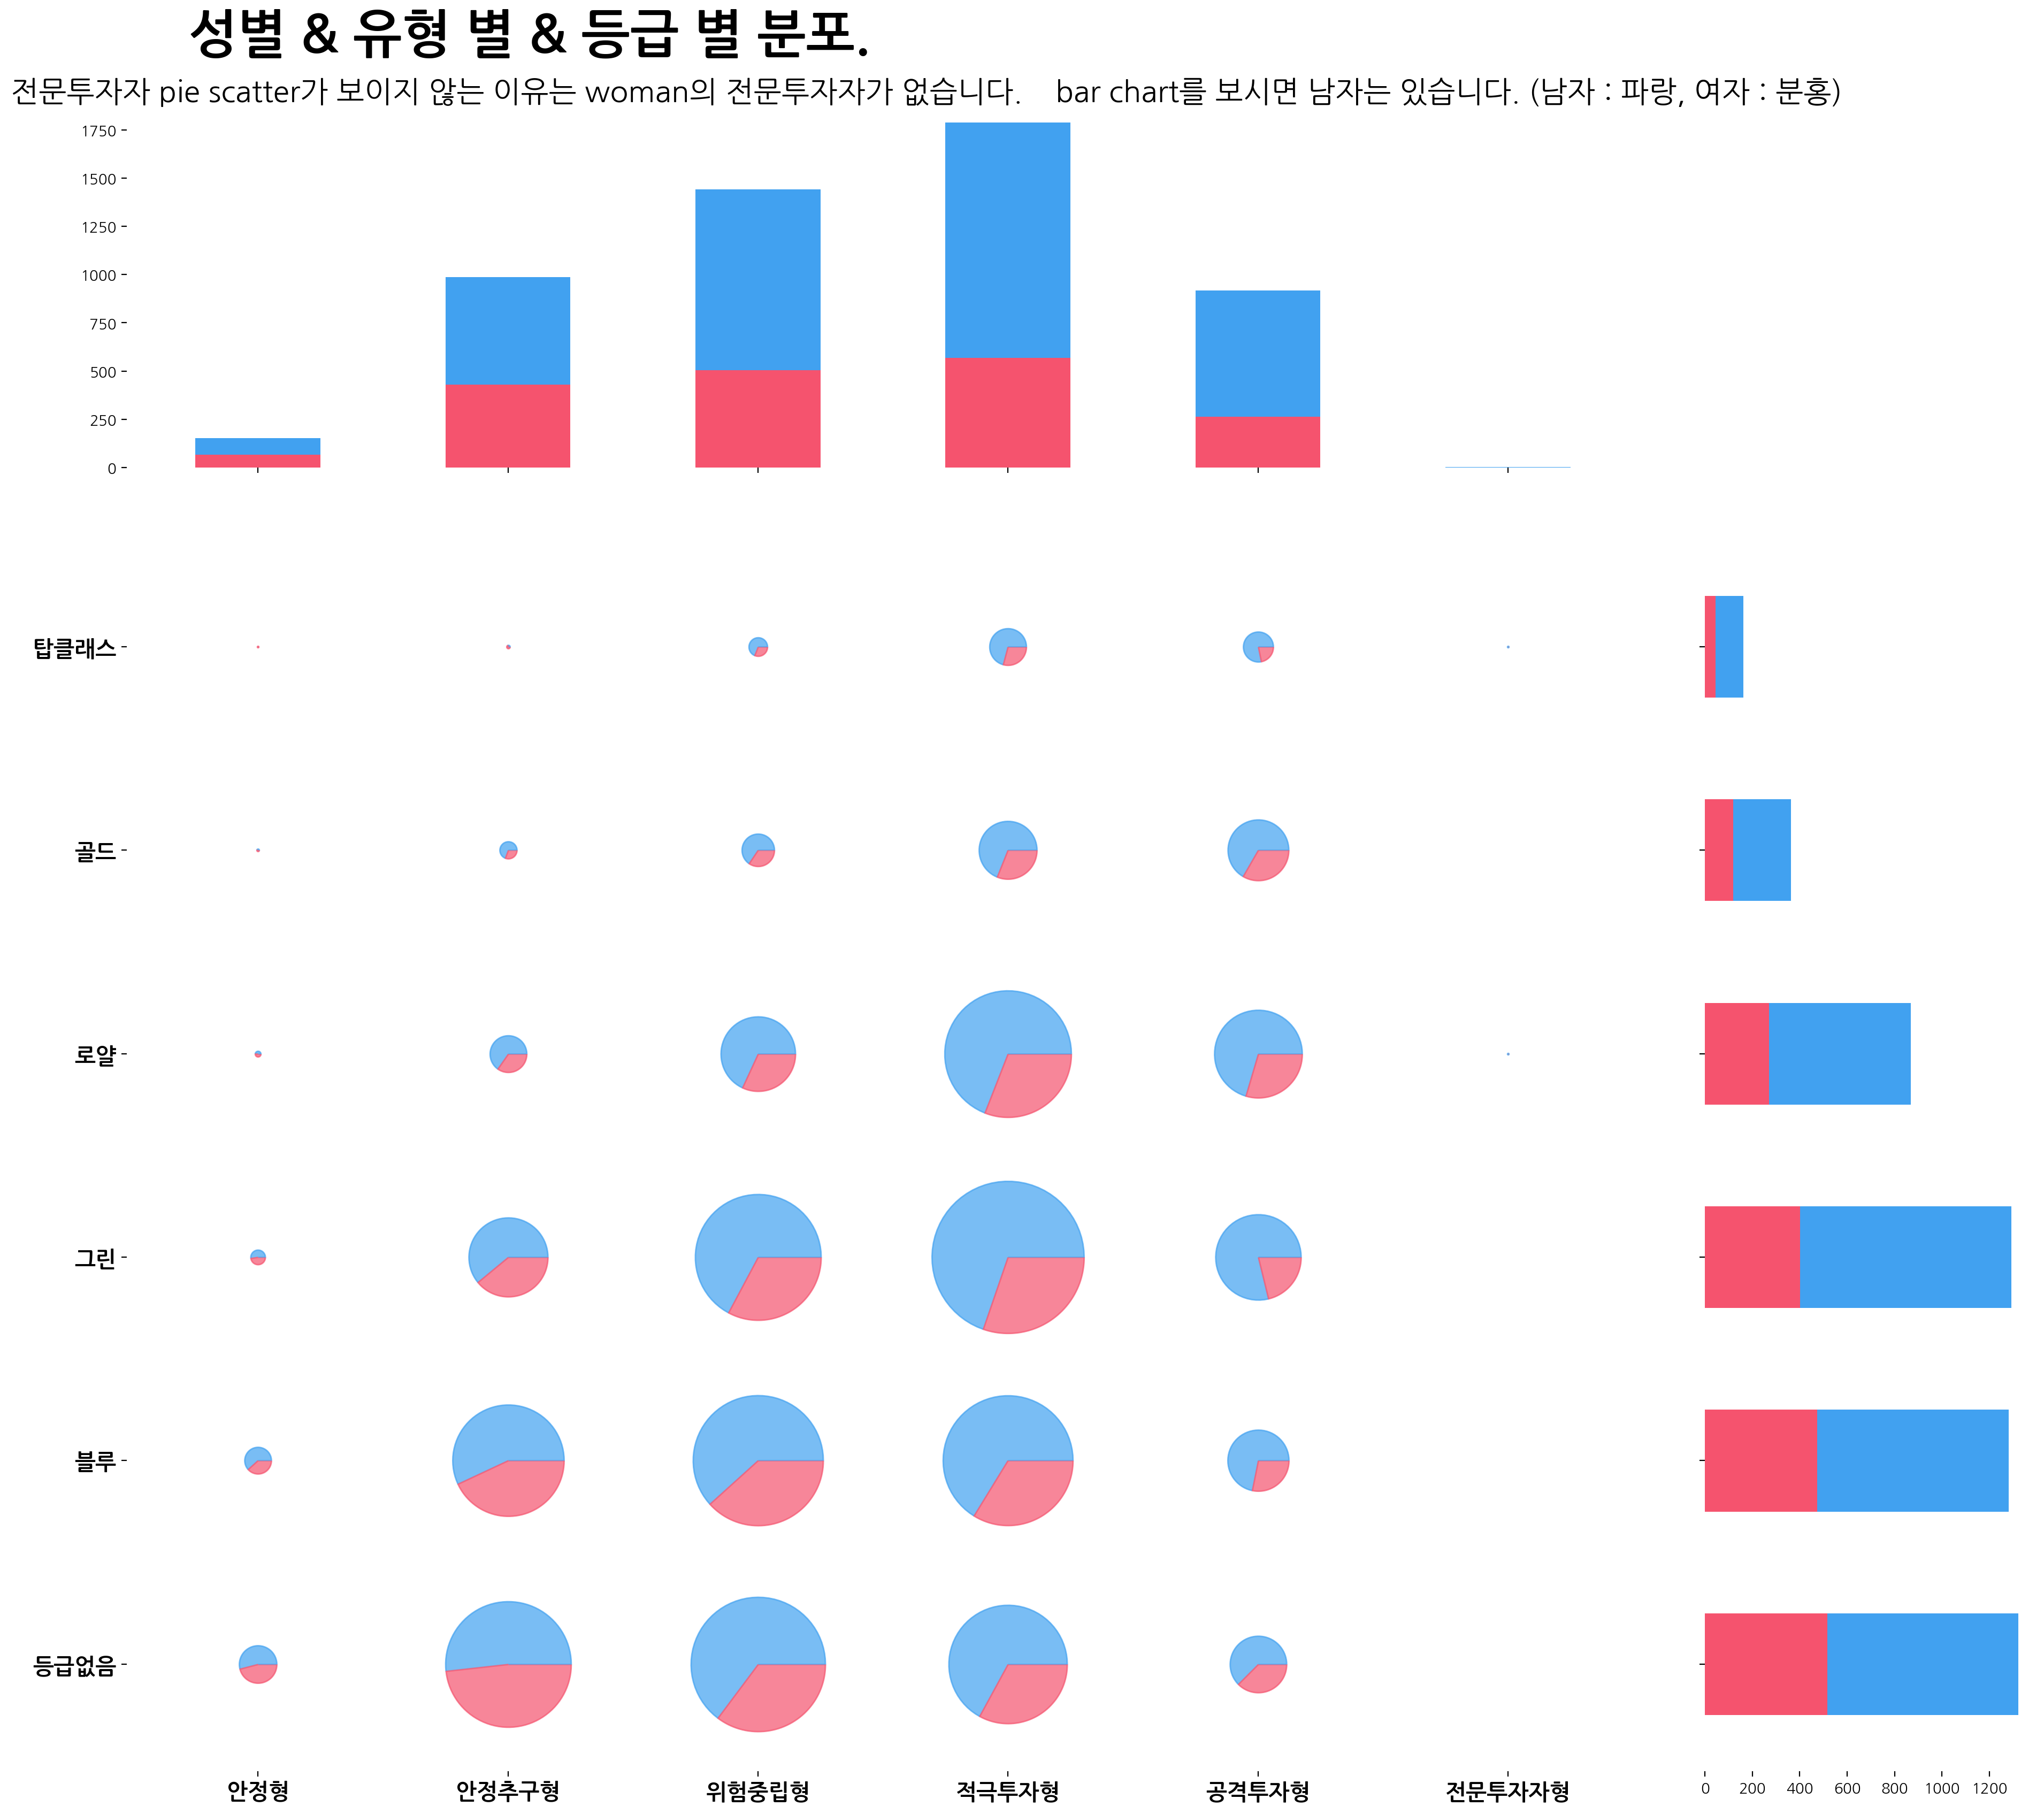

In [28]:
Piescatter("성별 & 유형 별 & 등급 별 분포.")

어떤 종목이 인기가 있는지 봤습니다.   

<mark>매수,매도 합쳐서 count가 제일 많은 종목 10개를 추렸습니다.</mark>  

참고로 델타에어라인스나 보잉이 왜 이렇게 많은지 봤는데 2019년 경우 한가지를 제외하면 모두 2020년 3월부터 매수/매도를 했습니다.   

<mark>코로나 영향을 받았다는 뜻</mark>입니다. <a href="https://www.sedaily.com/NewsVIew/1Z3ZJ48VM3">참고링크</a>  

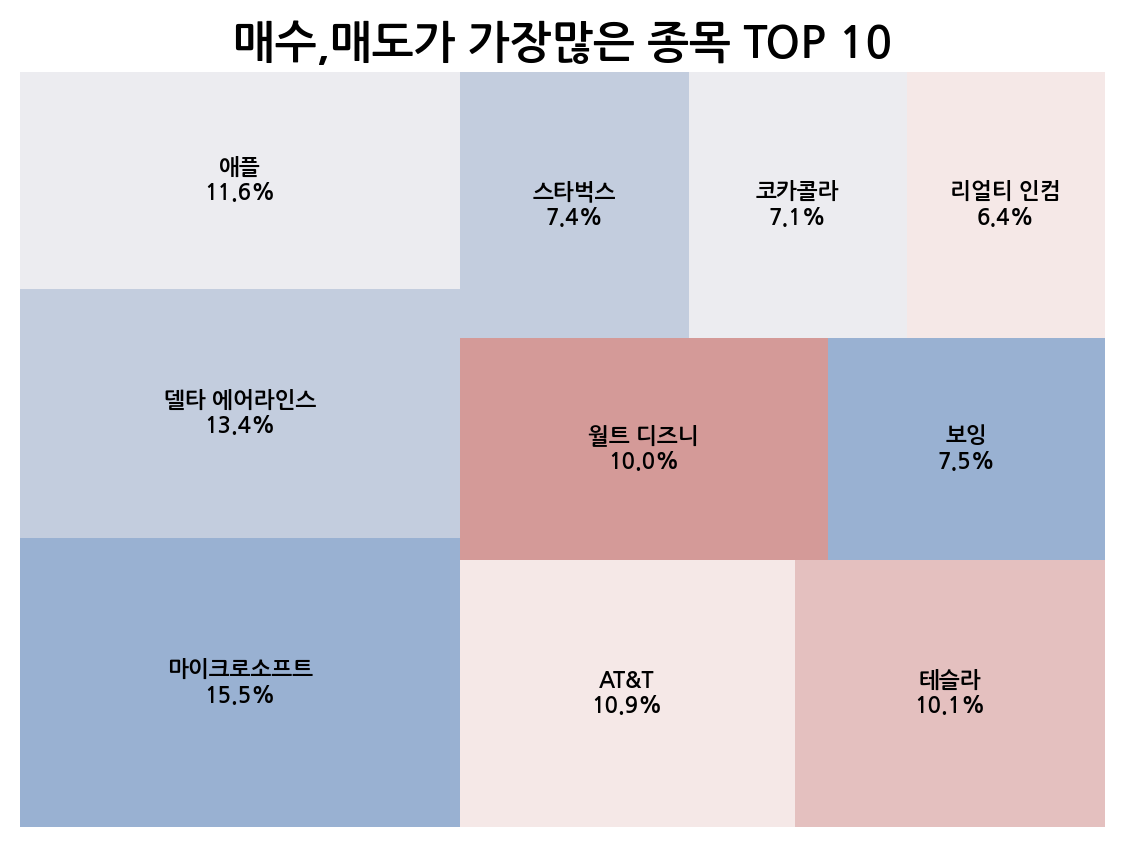

In [29]:
treeplot("매수,매도가 가장많은 종목 TOP 10",labels,sizes)

투자자 유형 별 선호하는 종목을 봤습니다.  

신기한 점에 대해서 말하겠습니다.     

안정형은 월트디즈니, CG 벨로시티 원유 종목 , ICT 등에 많이 투자했고,      

안정추구형은 ICT, 델타 에어라인스 등이 있습니다.    

공격투자형에는 아머 레지던셜 등 부동산 관련 종목이 있습니다. EPR. 잘은 모르지만, 부동산에 투자하는 리츠주 라고합니다.   

적극투자형에는 안정형과 비슷한 종목이 보였고,     
 
위험중립형에는 안정추구형과 비슷한 종목과 퍼스트 머제스틱 실버 같은 금/은 채굴 기업관련 종목이 있었습니다.      

안정적인 투자를 base로 둔 투자자들은 ICT, 원유 등 <mark>미래에도 쓰일것과 미래를 바라보는 것들을 많이 투자</mark>했다면    

공격적인 투자를 base로 둔 투자자들도 ICT, 부동산 등 <mark>미래를 바라본 종목</mark>에 많이 투자했습니다.   

<mark>투자는 미래를 보고 하는 것 같습니다.</mark>

In [30]:
PieChart('유형 별 선호 종목',10)

<h2>마무리</h2>

해외 주식 종목과, 투자자들의 데이터로 본 2019년 부터 2020년 6월까지의 <mark>주요 Item 은 ICT</mark>입니다.   

재밌었던 점은 ICT에 관심이 많다는 것과 금/은, 부동산 등.   

델타 에어라인스같이 코로나에 영향을 받으면 주식이 흔들리는 것을 데이터로 보는게 흥미로웠습니다. 

찾아보니까 멋진 말들이 많았습니다. 마지막으로 뉴턴의 명언 쓰겠습니다.   

<blockquote><p style="font-weight:bold">천체의 움직임은 계산할 수 있지만,<br>
    인간의 광기까지 계산할 수 없다.</p><cite>-Issac Newton </cite></blockquote> 
    
역시 사람마음은 알다가도 모르겠습니다.